In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [154]:
data=pd.read_csv("games-regression-dataset.csv")
data.head()

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Rate
0,https://apps.apple.com/us/app/heir-of-light/id...,1264483706,HEIR OF LIGHT,Dark Fantasy RPG,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,982,0.00,"29.99, 19.99, 9.99, 29.99, 29.99, 8.99, 4.99, ...","A Dark Fantasy, Collectible RPG\n\nDarkness ha...",GAMEVIL Inc.,12+,"EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI",894489600,Games,"Games, Role Playing, Strategy",6/3/2018,31/07/2019,Intermediate
1,https://apps.apple.com/us/app/endgame-eurasia/...,607705356,Endgame:Eurasia,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,19,0.00,NaN,"""This interactive experience is an exploration...",Auroch Digital Ltd,12+,EN,116407296,Games,"Games, Simulation, Strategy, News",21/03/2013,28/06/2017,Intermediate
2,https://apps.apple.com/us/app/free-solitaire/i...,627491527,Free Solitaire+,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,14,0.00,NaN,Same Solitaire game with classic Solitaire run...,Chen Zhong Yuan,4+,"EN, ZH",50647040,Games,"Games, Strategy, Entertainment, Card",4/4/2013,21/04/2015,High
3,https://apps.apple.com/us/app/draft-trainer/id...,430252596,Draft Trainer,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,88,1.99,NaN,** Discounted for a limited time **\n\nEver wo...,"GG Wizards, LLC",9+,EN,28120064,Games,"Games, Utilities, Card, Strategy",26/05/2011,23/07/2019,Intermediate
4,https://apps.apple.com/us/app/rogue-knight-inf...,1115082819,Rogue Knight: Infested Lands,Tactical roguelike w/ stealth,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,13,3.99,NaN,Fight or sneak your way through hordes of mons...,Luis Regueira,12+,EN,39915520,Games,"Games, Role Playing, Strategy",19/05/2017,6/2/2019,High


In [155]:
# rows_with_nulls = data[data.isnull().any(axis=1)]
# rows_with_nulls.to_csv('output.csv', index=False)

In [156]:
X=data.drop('Rate',axis=1)
y=data['Rate']

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=2)

In [103]:
train_data=pd.concat([X_train,y_train],axis='columns')
test_data=pd.concat([X_test,y_test],axis='columns')


In [104]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4171 entries, 253 to 2575
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           4171 non-null   object 
 1   ID                            4171 non-null   int64  
 2   Name                          4171 non-null   object 
 3   Subtitle                      1167 non-null   object 
 4   Icon URL                      4171 non-null   object 
 5   User Rating Count             4171 non-null   int64  
 6   Price                         4171 non-null   float64
 7   In-app Purchases              2535 non-null   object 
 8   Description                   4171 non-null   object 
 9   Developer                     4171 non-null   object 
 10  Age Rating                    4171 non-null   object 
 11  Languages                     4161 non-null   object 
 12  Size                          4171 non-null   int64  
 13  P

In [105]:
train_data.shape

(4171, 18)

In [106]:
train_data.describe()

,ID,User Rating Count,Price,Size
count,4.171000e+03,4.171000e+03,4171.000000,4.171000e+03
mean,8.661515e+08,4.145890e+03,0.602407,1.381858e+08
std,2.945126e+08,5.543394e+04,2.730678,2.554433e+08
min,2.849214e+08,5.000000e+00,0.000000,2.158400e+05
25%,5.952646e+08,1.300000e+01,0.000000,2.761677e+07
50%,9.177783e+08,5.000000e+01,0.000000,6.700851e+07
75%,1.112485e+09,3.380000e+02,0.000000,1.591173e+08
max,1.341837e+09,3.032734e+06,139.990000,4.005591e+09


In [107]:
train_data.isnull().sum().sort_values(ascending=False)

Subtitle                        3004
In-app Purchases                1636
Languages                         10
URL                                0
Age Rating                         0
Current Version Release Date       0
Original Release Date              0
Genres                             0
Primary Genre                      0
Size                               0
Developer                          0
ID                                 0
Description                        0
Price                              0
User Rating Count                  0
Icon URL                           0
Name                               0
Rate                               0
dtype: int64

In [108]:
train_data.drop(['Subtitle','In-app Purchases'],axis=1,inplace=True)

In [109]:
train_data['Languages'].fillna(train_data['Languages'].mode()[0], inplace=True)

In [110]:
train_data.duplicated().sum()
#remove them

25

In [111]:
train_data.drop_duplicates(inplace=True)

# EDA

<Axes: xlabel='Rate', ylabel='count'>

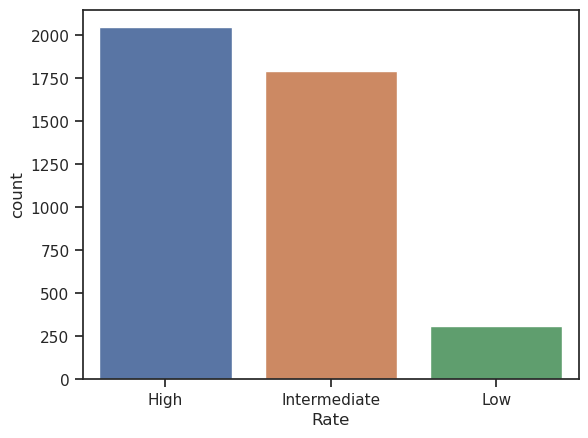

In [112]:
sns.countplot(x=train_data['Rate'])

data is unBalnced

<Axes: xlabel='Age Rating', ylabel='count'>

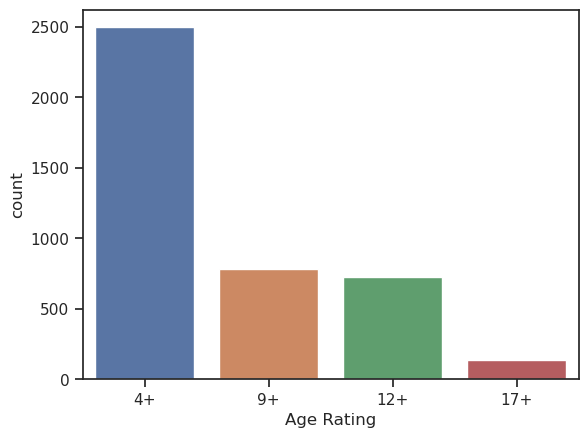

In [113]:
sns.countplot(x=train_data['Age Rating'])

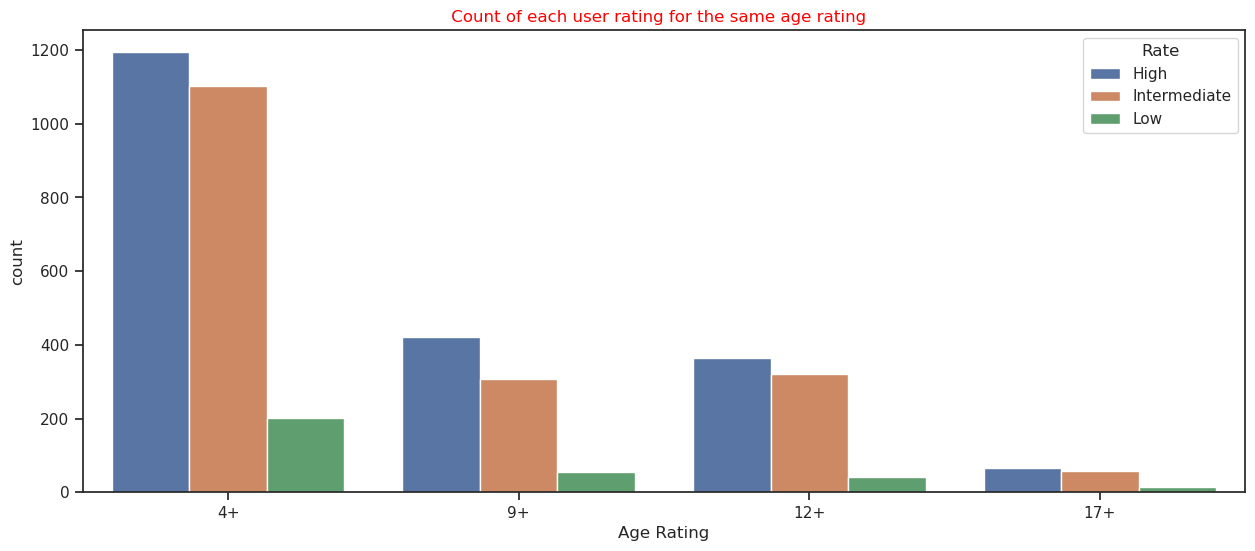

In [114]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x ='Age Rating',hue='Rate', data = train_data)
plt.title(" Count of each user rating for the same age rating   ",color="red");

disturbation is the same in all Age ratings >>> Not affected

In [115]:
Q1 = train_data['Size'].quantile(0.25)
Q3 = train_data['Size'].quantile(0.75)

x1=train_data[train_data['Size']<Q1]
x2=train_data[(train_data['Size']>Q1) & (train_data['Size']<Q3)]
x3=train_data[train_data['Size']>Q3]


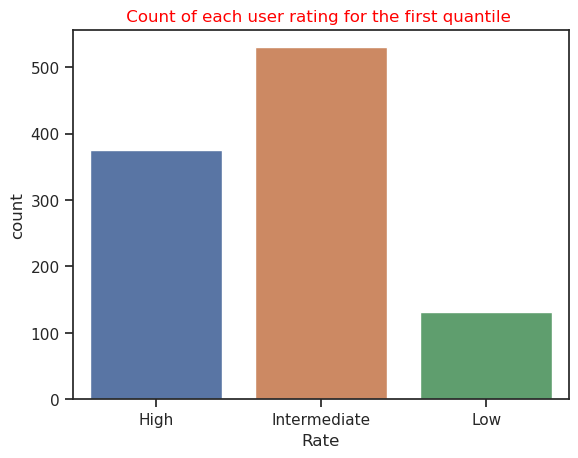

In [116]:
sns.countplot(x=x1['Rate'])
plt.title(" Count of each user rating for the first quantile  ",color="red");

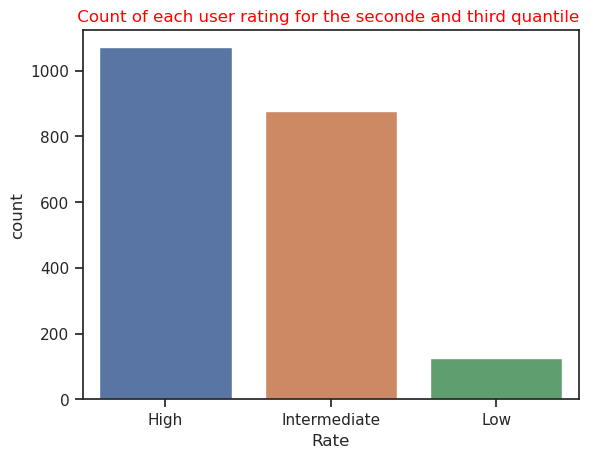

In [117]:
sns.countplot(x=x2['Rate'])
plt.title(" Count of each user rating for the seconde and third quantile  ",color="red");

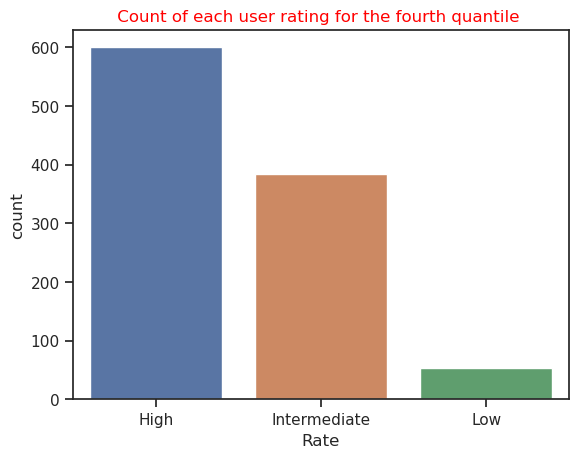

In [118]:
sns.countplot(x=x3['Rate'])
plt.title(" Count of each user rating for the fourth quantile  ",color="red");

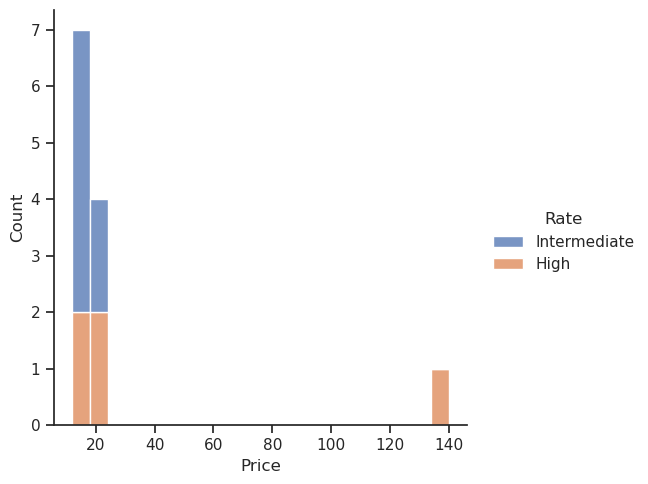

In [119]:
u=train_data[train_data['Price']>10]
sns.displot(data=u, x="Price", hue="Rate", multiple="stack")

In [120]:
len(u)

12

If price increasing does it affect to rating>>>>conclusion inc price inc Average directly porpointal

low no of row doesn't affect

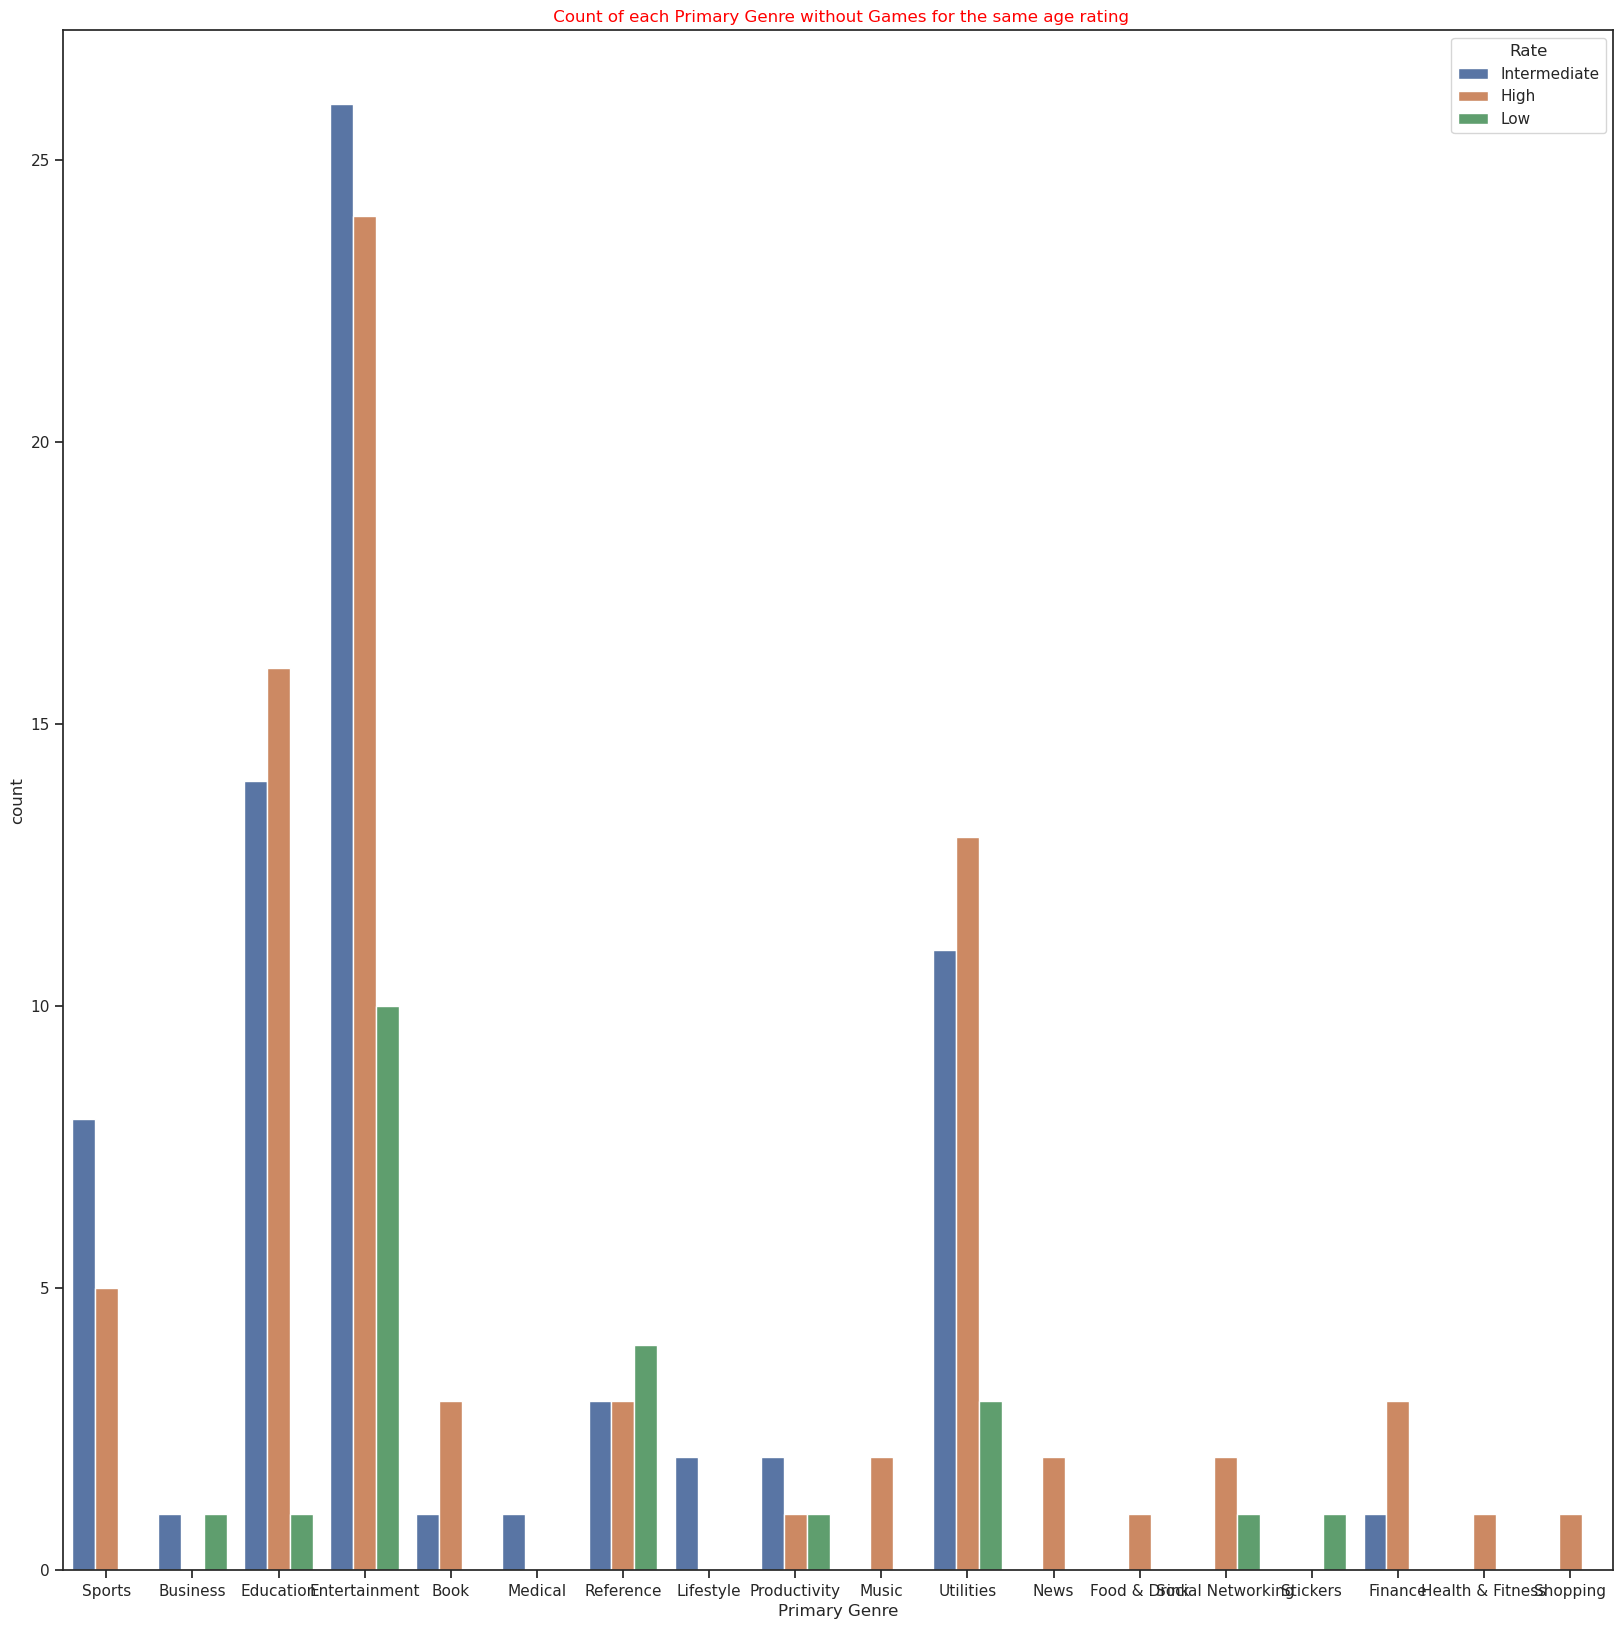

In [121]:
plt.figure(figsize=(20,20))
u=train_data.loc[(train_data["Primary Genre"]!='Games')]

ax = sns.countplot(x ='Primary Genre',hue='Rate', data = u)
plt.title(" Count of each Primary Genre without Games for the same age rating",color="red");

Outliers Detected

In [122]:
len(u)

169

In [123]:
# data['Original Release Date']=pd.to_datetime(data["Original Release Date"], dayfirst=True)
# data['Current Version Release Date']=pd.to_datetime(data["Current Version Release Date"], dayfirst=True)

# data['Original Release Year']=data['Original Release Date'].dt.year
# data['Current Version Release Year']=data['Current Version Release Date'].dt.year


# data.drop(['Original Release Date','Current Version Release Date'],axis=1,inplace=True)
#  plt.figure(figsize=(15,10))
# ax = sns.countplot(x ='Original Release Year',hue='Average User Rating', data = data)
# plt.title(" User Rating for each year   ",color="red");

In [124]:
train_data['Original Release Date'] = pd.to_datetime(train_data['Original Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')
train_data['Current Version Release Date'] = pd.to_datetime(train_data['Current Version Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')

In [125]:
train_data['Age Rating']=train_data['Age Rating'].str.replace('+', '')
train_data['Age Rating']=train_data['Age Rating'].apply(pd.to_numeric)
train_data['Age Rating']

/tmp/ipykernel_11532/2599777923.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_data['Age Rating']=train_data['Age Rating'].str.replace('+', '')


253      4
2592     9
1605     4
4661     4
2        4
        ..
3335     4
1099     4
2514     4
3606    12
2575     4
Name: Age Rating, Length: 4146, dtype: int64

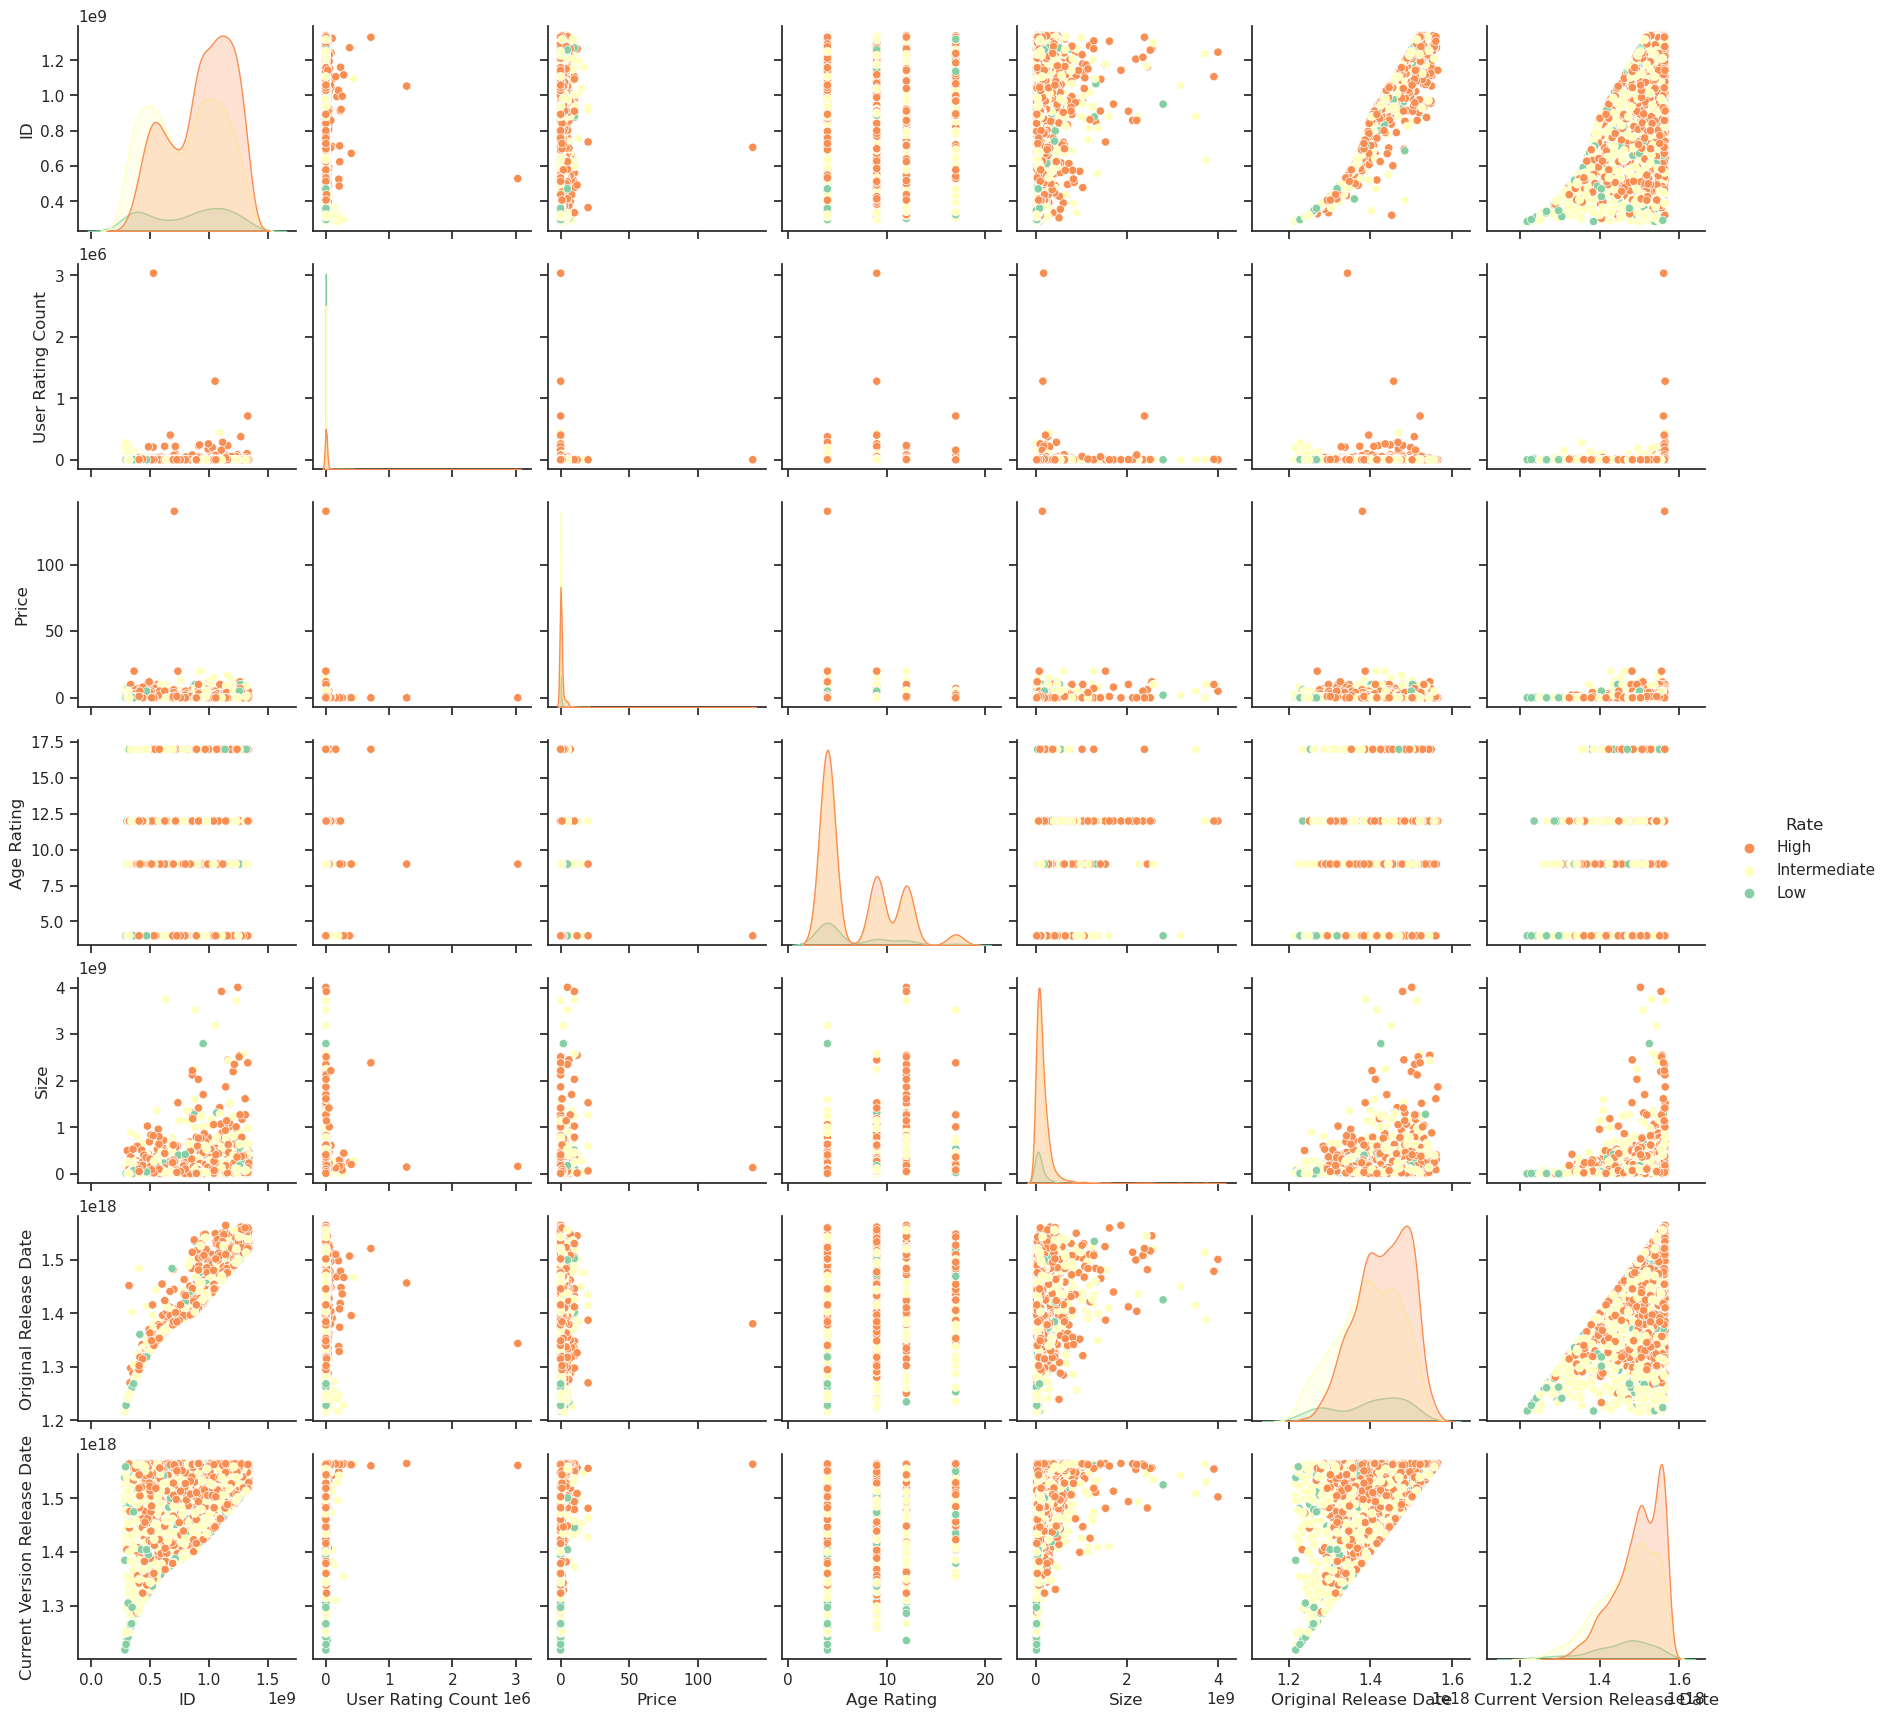

In [126]:
sns.set_theme(style="ticks")
sns.pairplot(train_data, hue="Rate",palette="Spectral")

In [127]:
train_data['Developer'].value_counts()

Tapps Tecnologia da Informa\xe7\xe3o Ltda.    78
Detention Apps                                27
HexWar Games Ltd                              22
EASY Inc.                                     19
Qumaron                                       19
                                              ..
Etcetera Edutainment, Inc.                     1
Laylo Inc.                                     1
Jabatoba AB                                    1
Superbrightly Studio LLC                       1
Helen Cheng                                    1
Name: Developer, Length: 2607, dtype: int64

In [128]:
train_data['Name'].is_unique

True

In [129]:
train_data['ID'].is_unique

True

In [130]:
train_data['URL'].is_unique

True

In [131]:
train_data['Icon URL'].is_unique

True

In [132]:
train_data['Primary']=train_data['Primary Genre']

In [133]:
from scipy.stats import chi2_contingency

In [134]:
# Create a contingency table of observed frequencies
contingency = pd.crosstab(train_data['Primary'], train_data['Rate'])
# Calculate expected frequencies assuming independence
chi2, p, dof, expected = chi2_contingency(contingency)
# Print results
print('p-value: %f' % p)

p-value: 0.002017


In [135]:
# Create a contingency table of observed frequencies
contingency = pd.crosstab(train_data['Developer'], train_data['Rate'])
# Calculate expected frequencies assuming independence
chi2, p, dof, expected = chi2_contingency(contingency)
# Print results
print('p-value: %f' % p)

p-value: 0.000000


In [136]:
# Create a contingency table of observed frequencies
contingency = pd.crosstab(train_data['Languages'], train_data['Rate'])
# Calculate expected frequencies assuming independence
chi2, p, dof, expected = chi2_contingency(contingency)
# Print results
print('p-value: %f' % p)

p-value: 0.352535


In [137]:
# Create a contingency table of observed frequencies
contingency = pd.crosstab(train_data['Genres'], train_data['Rate'])
# Calculate expected frequencies assuming independence
chi2, p, dof, expected = chi2_contingency(contingency)
# Print results
print('p-value: %f' % p)

p-value: 0.013257


In [138]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
train_data['Rate']= label_encoder.fit_transform(train_data['Rate'])

In [139]:
train_data['Rate']

253     0
2592    0
1605    0
4661    0
2       0
       ..
3335    1
1099    0
2514    0
3606    0
2575    0
Name: Rate, Length: 4146, dtype: int64

/tmp/ipykernel_11532/3470809464.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True)


<Axes: >

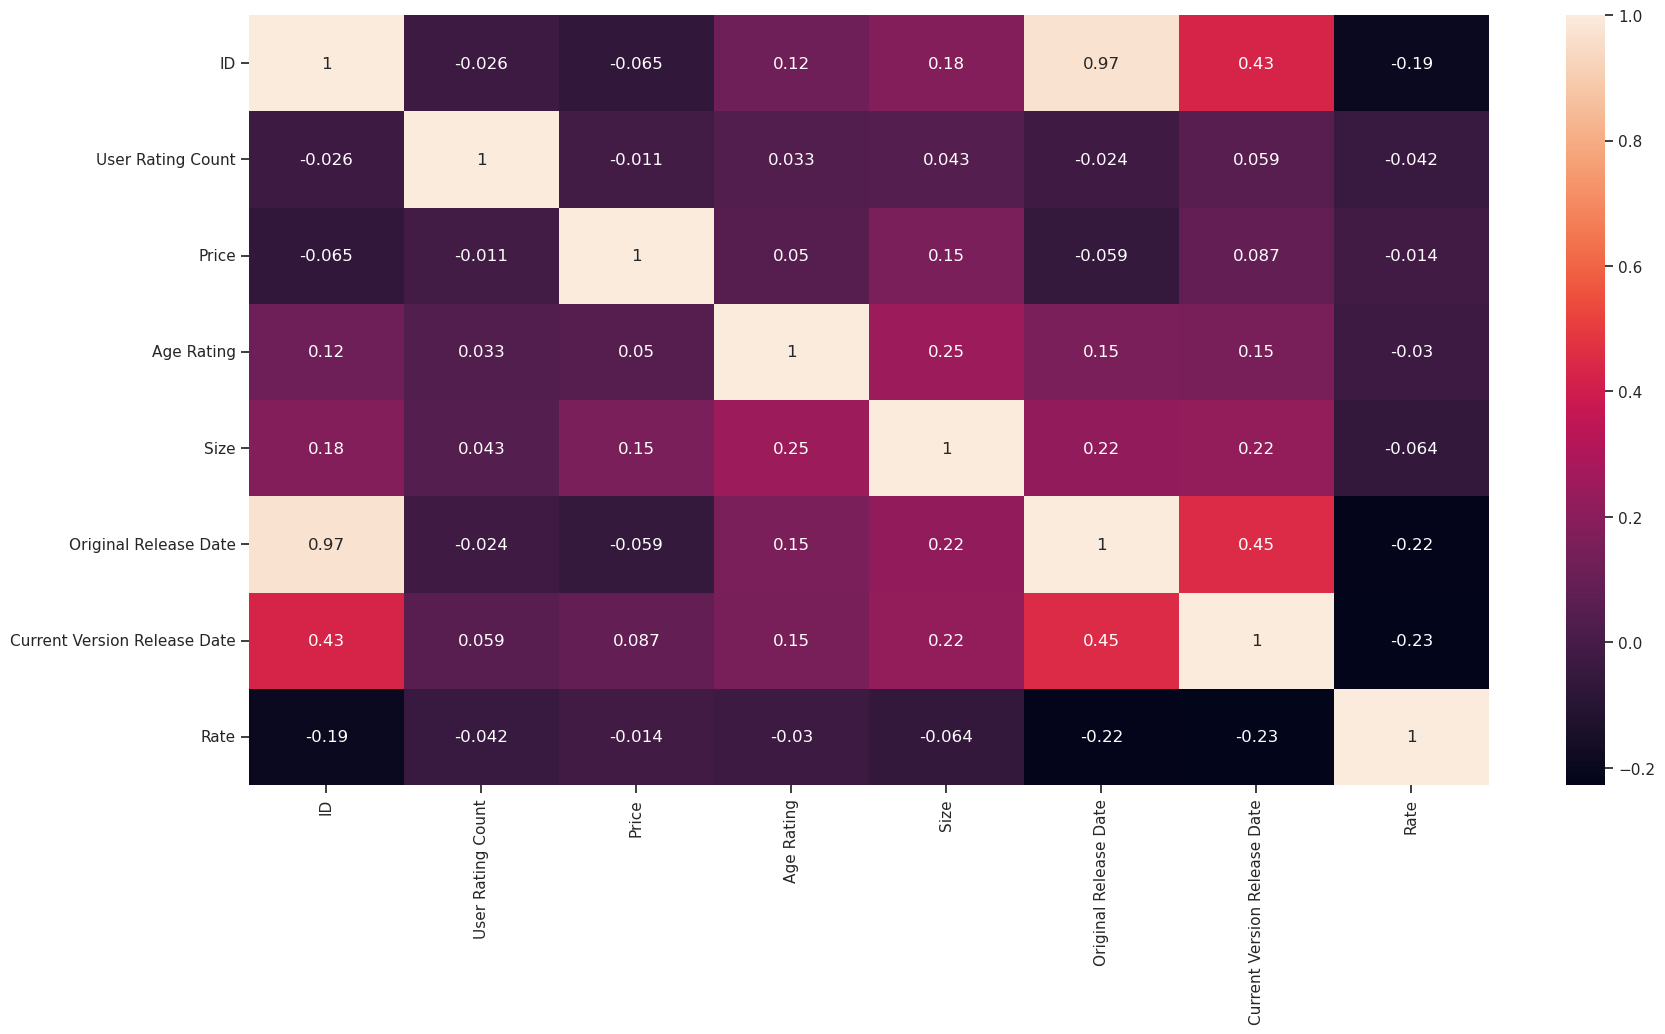

In [140]:
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(),annot=True)

In [141]:
train_data['Description'] = train_data['Description'].replace(len(train_data['Description']))
train_data['Description_length'] = [len(i) for i in train_data['Description']]
train_data['Description_word_length'] = [1 if i<= 500 else 2 if 500<i<=1000 else 3 for i in train_data['Description_length']]
train_data.drop(['Description', 'Description_length'], axis=1, inplace = True)

In [142]:
train_data['Size'] = train_data['Size']/(1024*1024)
train_data['Size'] = [1 if i<= 1 else 2 if 1<i<=10 else 3 for i in train_data['Size']]


In [143]:
train_data.describe()

,ID,User Rating Count,Price,Age Rating,Size,Original Release Date,Current Version Release Date,Rate,Description_word_length
count,4.146000e+03,4.146000e+03,4146.000000,4146.000000,4146.000000,4.146000e+03,4.146000e+03,4146.000000,4146.000000
mean,8.666459e+08,4.153489e+03,0.602436,6.777858,2.917270,1.412819e+18,1.481145e+18,0.581042,2.390497
std,2.945732e+08,5.559775e+04,2.737325,3.717672,0.287506,7.351076e+16,6.703752e+16,0.626567,0.775186
min,2.849214e+08,5.000000e+00,0.000000,4.000000,1.000000,1.215734e+18,1.217549e+18,0.000000,1.000000
25%,5.953570e+08,1.300000e+01,0.000000,4.000000,3.000000,1.363910e+18,1.439986e+18,0.000000,2.000000
50%,9.181146e+08,5.000000e+01,0.000000,4.000000,3.000000,1.418861e+18,1.494461e+18,1.000000,3.000000
75%,1.113328e+09,3.377500e+02,0.000000,9.000000,3.000000,1.473120e+18,1.537207e+18,1.000000,3.000000
max,1.341837e+09,3.032734e+06,139.990000,17.000000,3.000000,1.564704e+18,1.564790e+18,2.000000,3.000000


In [144]:
train_data.drop(['URL','Icon URL','Name','ID','Languages','Primary','Age Rating'],axis=1,inplace=True)
#data.drop(['URL','Icon URL','Name','ID','Description','Languages'],axis=1,inplace=True)

In [145]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4146 entries, 253 to 2575
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User Rating Count             4146 non-null   int64  
 1   Price                         4146 non-null   float64
 2   Developer                     4146 non-null   object 
 3   Size                          4146 non-null   int64  
 4   Primary Genre                 4146 non-null   object 
 5   Genres                        4146 non-null   object 
 6   Original Release Date         4146 non-null   int64  
 7   Current Version Release Date  4146 non-null   int64  
 8   Rate                          4146 non-null   int64  
 9   Description_word_length       4146 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 356.3+ KB


In [146]:
def one_hot_encoding(data,to_be_hot_encoded):
    list_all_unique = []
    # Get New Columns Names.
    for feature in to_be_hot_encoded:
        unique_values = set()
        for i in range(0, len(data)):
            cell = data[feature].iloc[i]  # Equivalent to X[feature][i]
            if not pd.isnull(cell):
                valuesList = cell.split(',')  # ex -> valuesList = [En, Fr, Da, SP]
                for value in valuesList:
                    unique_values.add(value)

        for item in unique_values:
            list_all_unique.append(item)

    returned=update_with_new_columns(data,list_all_unique,to_be_hot_encoded)
    return returned,list_all_unique

In [147]:
def update_with_new_columns(data,list_all_unique,to_be_hot_encoded):
    # Add New Columns.
    updated_data = data
    updated_data = updated_data.reset_index(drop=True)
    for value in list_all_unique:
        new_column_arr = np.zeros(len(data))
        new_column_df = pd.Series(new_column_arr, name=value)
        updated_data = pd.concat([updated_data, new_column_df], axis=1)

    # Remove Old Columns
    for feature in to_be_hot_encoded:
        updated_data.drop(feature, axis=1, inplace=True)

    # Add Ones in the right columns.
    for feature in to_be_hot_encoded:
        for i in range(0, len(data)):
            cell = data[feature].iloc[i]
            if not pd.isnull(cell):
                valuesList = cell.split(',')
                for value in valuesList:
                    if value in updated_data: # Check if 'value' is seen in training operation.     #else: ignore it.
                        value_i = updated_data.columns.get_loc(value)
                        updated_data.iloc[i, value_i] = 1

    # Update.
    return updated_data

In [148]:
traain,list_unquie_train=one_hot_encoding(train_data,['Developer','Genres','Primary Genre'])

In [149]:
from sklearn.ensemble import IsolationForest

model_IF = IsolationForest(contamination=float(0.1))
model_IF.fit(traain)

/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1)

In [150]:
traain['anomaly'] = model_IF.predict(traain)
data_without_outliers=traain.loc[traain['anomaly']!=-1]

In [151]:
X_train=data_without_outliers.drop(['Rate','anomaly'],axis=1)
y_train=data_without_outliers['Rate']

In [152]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputer.fit(X_train)

KNNImputer()

In [94]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

In [95]:
test_data.drop(['Subtitle','In-app Purchases','URL','Icon URL','ID','Name','Languages','Age Rating'],axis=1,inplace=True)


KeyError: "['Subtitle', 'In-app Purchases', 'URL', 'Icon URL', 'ID', 'Name', 'Languages', 'Age Rating'] not found in axis"

In [96]:
test_data['Original Release Date'] = pd.to_datetime(test_data['Original Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')
test_data['Current Version Release Date'] = pd.to_datetime(test_data['Current Version Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')

In [97]:
test_data['Description'] = test_data['Description'].replace(len(test_data['Description']))
test_data['Description_length'] = [len(i) for i in test_data['Description']]
test_data['Description_word_length'] = [1 if i<= 500 else 2 if 500<i<=1000 else 3 for i in test_data['Description_length']]
test_data.drop(['Description', 'Description_length'], axis=1, inplace = True)


KeyError: 'Description'

In [ ]:
test_data['Size'] = test_data['Size']/(1024*1024)
test_data['Size'] = [1 if i<= 1 else 2 if 1<i<=10 else 3 for i in test_data['Size']]

In [73]:
test_data.isnull().sum().sort_values(ascending=False)

User Rating Count               0
Price                           0
Developer                       0
Size                            0
Primary Genre                   0
Genres                          0
Original Release Date           0
Current Version Release Date    0
Rate                            0
Description_word_length         0
dtype: int64

In [74]:
teest=update_with_new_columns(test_data,list_unquie_train,['Developer','Genres','Primary Genre'])

In [75]:
X_test=teest.drop(['Rate'],axis=1)
y_test=teest['Rate']

In [76]:
X_test_std = sc.transform(X_test)

In [77]:
y_test= label_encoder.transform(y_test)

In [78]:
X_train_std.shape

(3731, 2726)

In [79]:
X_test_std.shape

(1043, 2726)

In [80]:
from imblearn.over_sampling import SMOTE

# X: feature matrix, y: target vector
smote = SMOTE()
X_train_std, y_train = smote.fit_resample(X_train_std, y_train)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f05386b76d0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f04

In [81]:
X_train_std.shape

(5529, 2726)

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from xgboost import XGBClassifier


## Grid search

In [83]:
from sklearn.model_selection import GridSearchCV

def grid_search (estimator, id ,param_grid):

    g_search = GridSearchCV(
    estimator= estimator, 
    param_grid= param_grid,
    scoring = 'accuracy',
    cv=5
    )

    g_search.fit(X_train_std, y_train)

    print(f"{id}  BESt ESTIMATOR: {g_search.best_estimator_}")
    print(f"{id}  BEST PARAMETERS: {g_search.best_params_}")
    print(f"{id}  BEST SCORE: {g_search.best_score_}")


## $\text{Logistic Regression}$

In [84]:
logreg=LogisticRegression(max_iter=1000,penalty='l2')

param_grid ={"C":[0.01,1,5,10]}

grid_search(logreg, "Logistic regression", param_grid)


KeyboardInterrupt: 

## $\text{Decision Tree}$

In [ ]:
param_grid = {
              'ccp_alpha': [0.1, 0.01, .001,1],
              'max_depth' : [5,10,15],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)

grid_search(tree_clas, "Decision Tree", param_grid)



Decision Tree  BESt ESTIMATOR: DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=10,
                       random_state=1024)
Decision Tree  BEST PARAMETERS: {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 10}
Decision Tree  BEST SCORE: 0.7092857911650291


## $\text{Random Forest}$

In [ ]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [700],
    'max_depth' : [10,15,20],
    'criterion' :['gini', 'entropy']
}

grid_search(rfc, "Random forest", param_grid)

Random forest  BESt ESTIMATOR: RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=700,
                       random_state=42)
Random forest  BEST PARAMETERS: {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 700}
Random forest  BEST SCORE: 0.7101642142165229


## $\text{Naive Bayes}$

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_search(model, "Naive", params_NB)

Naive  BESt ESTIMATOR: GaussianNB(var_smoothing=5.336699231206302e-09)
Naive  BEST PARAMETERS: {'var_smoothing': 5.336699231206302e-09}
Naive  BEST SCORE: 0.5798831434414256


## $\text{SVM}$

In [ ]:
clf = svm.SVC(kernel='linear',gamma=1)
clf.fit(X_train_std,y_train)
y_pred = clf.predict(X_test_std)

In [ ]:
print("Accuracy of Test "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy of Test 0.5541706615532119


              precision    recall  f1-score   support

           0       0.61      0.67      0.64       497
           1       0.56      0.50      0.53       467
           2       0.15      0.14      0.14        79

    accuracy                           0.55      1043
   macro avg       0.44      0.44      0.44      1043
weighted avg       0.55      0.55      0.55      1043



# XGB

In [ ]:
from xgboost import XGBClassifier

xgb=XGBClassifier(n_estimators=800)
xgb.fit(X_train_std,y_train)

y_pred_test = xgb.predict(X_test_std)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
print("Accuracy of Test: "+str(accuracy_score(y_test, y_pred_test)))
print('\n')
print(classification_report(y_test, y_pred_test))

Accuracy of Test: 0.5656759348034516


              precision    recall  f1-score   support

           0       0.59      0.66      0.62       497
           1       0.54      0.55      0.55       467
           2       0.41      0.09      0.15        79

    accuracy                           0.57      1043
   macro avg       0.51      0.43      0.44      1043
weighted avg       0.56      0.57      0.55      1043



## $\text{Best Models}$

# Logistic

In [ ]:
logreg=LogisticRegression(C=0.01,penalty='l2',max_iter=1500)

logreg.fit(X_train_std,y_train)

y_pred_test = logreg.predict(X_test_std)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
print("Accuracy of Test: "+str(accuracy_score(y_test, y_pred_test)))
print('\n')
print(classification_report(y_test, y_pred_test))

Accuracy of Test: 0.588686481303931


              precision    recall  f1-score   support

           0       0.61      0.72      0.66       497
           1       0.58      0.52      0.55       467
           2       0.31      0.14      0.19        79

    accuracy                           0.59      1043
   macro avg       0.50      0.46      0.47      1043
weighted avg       0.57      0.59      0.58      1043



# Random forest

In [85]:
rfc=RandomForestClassifier(criterion='gini', max_depth=25, n_estimators=700,random_state=42)
rfc.fit(X_train_std,y_train)
y_pred = rfc.predict(X_test_std)

In [86]:
print("Accuracy of Test "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy of Test 0.5973154362416108


              precision    recall  f1-score   support

           0       0.59      0.80      0.68       497
           1       0.61      0.47      0.53       467
           2       0.46      0.08      0.13        79

    accuracy                           0.60      1043
   macro avg       0.55      0.45      0.45      1043
weighted avg       0.59      0.60      0.57      1043



# saving the models

In [87]:
import pickle

In [88]:
filename = 'OneHotEncodingList'
pickle.dump(list_unquie_train, open(filename, 'wb'))

In [89]:
filename = 'LabelEncoder'
pickle.dump(label_encoder, open(filename, 'wb'))

In [90]:
filename = 'Standardization'
pickle.dump(sc, open(filename, 'wb'))

In [91]:
filename = 'Random_Forest_model'
pickle.dump(rfc, open(filename, 'wb'))

In [ ]:
filename = 'Logistic_Regression_model'
pickle.dump(logreg, open(filename, 'wb'))

In [ ]:
filename = 'Decision_Tree_model'
pickle.dump(tree_clas, open(filename, 'wb'))

In [ ]:
filename = 'Naive_Bayes_model'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
filename = 'SVM_model'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
filename = 'XGB_model'
pickle.dump(xgb, open(filename, 'wb'))

In [92]:
filename = 'knn_imputer'
pickle.dump(imputer, open(filename, 'wb'))